In [25]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [33]:
current_milli_time = lambda: int(round(time.time() * 1000000))
def noise(data):
    data = data.copy()
    mx = np.max(data)
    C = random.randint(10,100)
    for j in range(C):
            print("||",j,"-/-",C)
            i = random.randint(0, len(data))
            e = current_milli_time()
            #print(e)
            if e%2 == 0:
                data[i] += random.random()*mx
            else:
                data[i] -= random.random()*mx
            time.sleep(1)
    return data

In [40]:
x1 = np.linspace(-np.pi, np.pi, random.choice([16,32,64,256]))
x2 = np.linspace(-np.pi, np.pi, random.choice([16,32,64,256]))
x3 = np.linspace(-np.pi, np.pi, random.choice([16,32,64,256]))

pattern1 = ((np.sin(x1) + 0.2*np.sin(x1*3))) * (random.randint(6,12)/10)
pattern2 = (np.cos(x3) + 0.2*np.sin(x3**3))* (random.randint(6,12)/10)
pattern3 = (np.cos(x1**2) + 0.2*np.sin(1/x1))* (random.randint(6,14)/10)
pattern4 = (np.cos(2*(1/x2)) + 0.2*np.sin(np.sin(x2**3)))* (random.randint(6,12)/10)

#pattern1_noised = noise(pattern1)

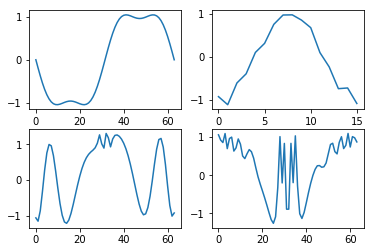

In [41]:
plt.subplot(2,2,1)
plt.plot(pattern1)
plt.subplot(2,2,2)
plt.plot(pattern2)
plt.subplot(2,2,3)
plt.plot(pattern3)
plt.subplot(2,2,4)
plt.plot(pattern4)

In [67]:
def create_data(patterns, count, supper = False):
    data = []
    labels = []
    for _ in range(count):
        i = random.randint(0,3)
        if current_milli_time()%random.randint(1,120)==0:
            if supper:
                print("stranging")
                min_len = min(len(patterns[i]),len(patterns[(i+1)%len(patterns)]))
                p1 = np.asarray(patterns[i])[:min_len]
                p2 = np.asarray(patterns[(i+1)%len(patterns)])[:min_len]
                data.extend(p1+p2)
                labels.extend([-i]*min_len)
        data.extend(patterns[i])
        labels.extend([i]*len(patterns[i]))
        
       
    return data, labels

In [68]:
patterns = [pattern2,pattern3,pattern4,pattern1]
data, labels = create_data(patterns, 100, supper = False)
super_data, super_labels = create_data(patterns, 100, supper = True)
print(len(data),"-", len(labels))

stranging
stranging
5344 - 5344


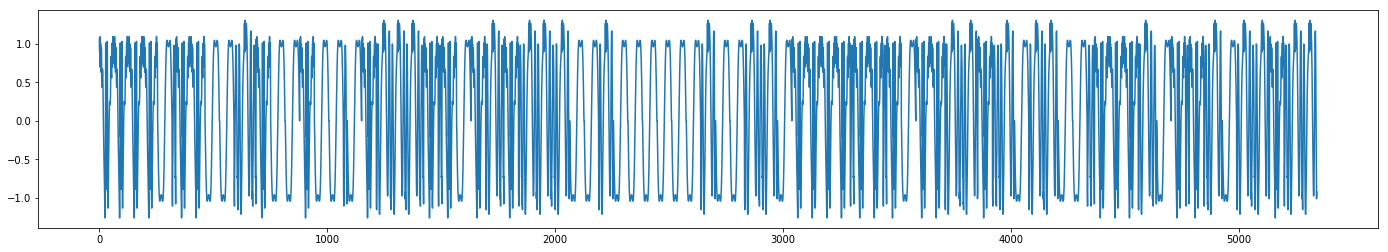

In [69]:
plt.figure(figsize = (24,4))
plt.plot(data)

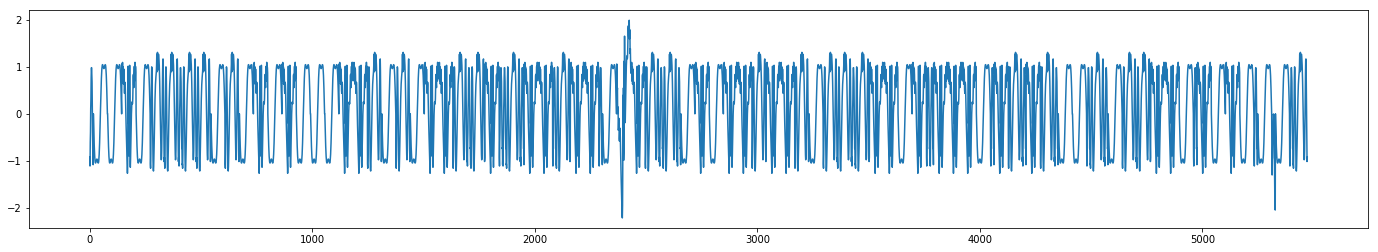

In [70]:
plt.figure(figsize = (24,4))
plt.plot(super_data)

In [71]:
noised = noise(data)

|| 0 -/- 75
|| 1 -/- 75
|| 2 -/- 75
|| 3 -/- 75
|| 4 -/- 75
|| 5 -/- 75
|| 6 -/- 75
|| 7 -/- 75
|| 8 -/- 75
|| 9 -/- 75
|| 10 -/- 75
|| 11 -/- 75
|| 12 -/- 75
|| 13 -/- 75
|| 14 -/- 75
|| 15 -/- 75
|| 16 -/- 75
|| 17 -/- 75
|| 18 -/- 75
|| 19 -/- 75
|| 20 -/- 75
|| 21 -/- 75
|| 22 -/- 75
|| 23 -/- 75
|| 24 -/- 75
|| 25 -/- 75
|| 26 -/- 75
|| 27 -/- 75
|| 28 -/- 75
|| 29 -/- 75
|| 30 -/- 75
|| 31 -/- 75
|| 32 -/- 75
|| 33 -/- 75
|| 34 -/- 75
|| 35 -/- 75
|| 36 -/- 75
|| 37 -/- 75
|| 38 -/- 75
|| 39 -/- 75
|| 40 -/- 75
|| 41 -/- 75
|| 42 -/- 75
|| 43 -/- 75
|| 44 -/- 75
|| 45 -/- 75
|| 46 -/- 75
|| 47 -/- 75
|| 48 -/- 75
|| 49 -/- 75
|| 50 -/- 75
|| 51 -/- 75
|| 52 -/- 75
|| 53 -/- 75
|| 54 -/- 75
|| 55 -/- 75
|| 56 -/- 75
|| 57 -/- 75
|| 58 -/- 75
|| 59 -/- 75
|| 60 -/- 75
|| 61 -/- 75
|| 62 -/- 75
|| 63 -/- 75
|| 64 -/- 75
|| 65 -/- 75
|| 66 -/- 75
|| 67 -/- 75
|| 68 -/- 75
|| 69 -/- 75
|| 70 -/- 75
|| 71 -/- 75
|| 72 -/- 75
|| 73 -/- 75
|| 74 -/- 75


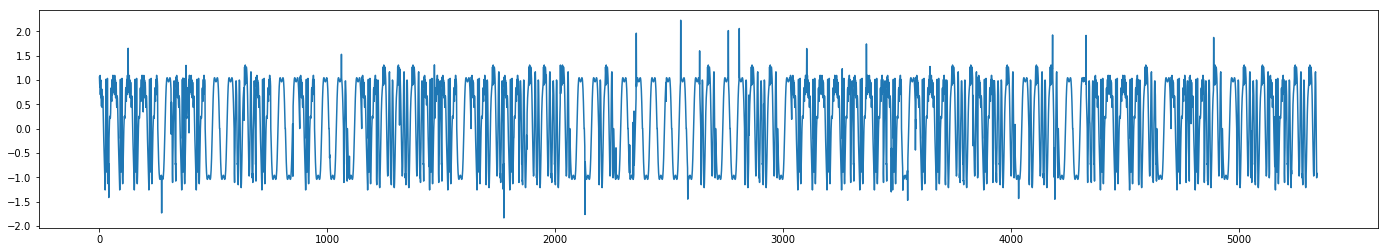

In [72]:
plt.figure(figsize = (24,4))
plt.plot(noised)

In [73]:
import pickle
dataset_name = 'db%d'%current_milli_time()

with open('datasets/original_%s.pickle'%dataset_name, 'wb') as f:
     pickle.dump(data, f)
with open('datasets/noised_%s.pickle'%dataset_name, 'wb') as f:
     pickle.dump(data, f)
with open('datasets/labels_%s.pickle'%dataset_name, 'wb') as f:
     pickle.dump(labels, f)
with open('datasets/st_data_%s.pickle'%dataset_name, 'wb') as f:
     pickle.dump(super_data, f)
with open('datasets/st_labels_%s.pickle'%dataset_name, 'wb') as f:
     pickle.dump(super_labels, f)